Tortorella2000

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (4, 3)

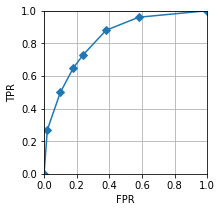

In [2]:
fpr = np.array([0, .02, .1, .18, .24, .38, .58, 1])
tpr = np.array([0, .27, .5, .65, .73, .88, .96, 1])
thresholds = np.array([1, .9, .7, .3, .25, .2, .1, 0])

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, 'D-')
    ax.set_aspect('equal', 'box')
    ax.set_ylim([0, 1])
    ax.set_xlim([0, 1])
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    
plot_roc(fpr, tpr)

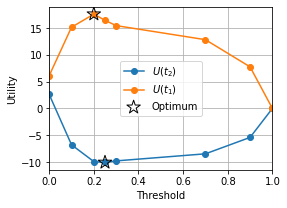

In [3]:
cr = 12.5
cfn = 100
cfp = 50
ctn = -25
ctp = -50

cfnr = cfn - cr
cfpr = cfp - cr
ctnr = ctn - cr
ctpr = ctp - cr

priorn = 500/(500 + 268)
priorp = 268/(500 + 268)

k2 = priorp * ctpr * tpr + priorn * cfpr * fpr
k1 = priorp * cfnr * tpr + priorn * ctnr * fpr

t2opt_idx = np.argmin(k2)
t1opt_idx = np.argmax(k1)

t2opt = thresholds[t2opt_idx]
t1opt = thresholds[t1opt_idx]

def plot_utilities(k1, k2, t1opt, t2opt, t1opt_idx, t2opt_idx):
    plt.plot(thresholds, k2, 'o-', label='$U(t_{2})$')
    plt.plot(thresholds, k1, 'o-', label='$U(t_{1})$')
    plt.scatter(t1opt, k1[t1opt_idx], marker='*', color='none', edgecolor='k', s=200, zorder=100, label='Optimum')
    plt.scatter(t2opt, k2[t2opt_idx], marker='*', color='none', edgecolor='k', s=200, zorder=100)
    plt.xlabel('Threshold')
    plt.ylabel('Utility')
    plt.xlim([0, 1])
    plt.legend()
    
plot_utilities(k1, k2, t1opt, t2opt, t1opt_idx, t2opt_idx)

In [4]:
m1 = - (priorn * ctnr) / (priorp * cfnr)
m2 = - (priorn * cfpr) / (priorp * ctpr)

print(m1)
print(m2)

0.7995735607675907
1.119402985074627


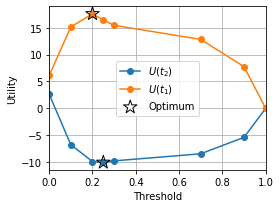

In [5]:
def abline(slope, intercept):
    """Plot a line from slope and intercept
        source: https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    axes.plot(x_vals, y_vals, '--')

plot_utilities(k1, k2, t1opt, t2opt, t1opt_idx, t2opt_idx)

#for k in k1:
#    abline(m1, k)
    
#for k in k2:
#    abline(m2, k)

plt.tight_layout()
plt.savefig('tortorella2000_u.pdf')

<ipython-input-6-318138c5f2ac>:20: UserWarning: 'frac' option in 'arrowprops' is no longer supported; use 'headlength' to set the head length in points.
  plt.tight_layout()
<ipython-input-6-318138c5f2ac>:21: UserWarning: 'frac' option in 'arrowprops' is no longer supported; use 'headlength' to set the head length in points.
  plt.savefig('tortorella2000_roc.pdf')
<ipython-input-6-318138c5f2ac>:21: UserWarning: 'frac' option in 'arrowprops' is no longer supported; use 'headlength' to set the head length in points.
  plt.savefig('tortorella2000_roc.pdf')
/home/mp15688/git/machine_learning_concepts/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: 'frac' option in 'arrowprops' is no longer supported; use 'headlength' to set the head length in points.
  fig.canvas.print_figure(bytes_io, **kw)


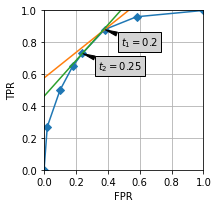

In [6]:
plot_roc(fpr, tpr)

xvals = np.array([0, 1])
intercept = tpr[t1opt_idx] - fpr[t1opt_idx]*m1
slope = m1
yvals =  intercept + slope*xvals
plt.plot(xvals, yvals)

intercept = tpr[t2opt_idx] - fpr[t2opt_idx]*m2
slope = m2
yvals =  intercept + slope*xvals
plt.plot(xvals, yvals)

for name, topt, topt_idx in zip(['1', '2'], [t1opt, t2opt], [t1opt_idx, t2opt_idx]):
    plt.annotate('$t_{} = {}$'.format(name, topt), xy=[fpr[topt_idx], tpr[topt_idx]],
                 xytext=[fpr[topt_idx]+0.1, tpr[topt_idx]-0.1],
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=4, frac=3),
                 bbox=dict(boxstyle="square,pad=0.3", fc="lightgray", ec="k", lw=1))
    
plt.tight_layout()
plt.savefig('tortorella2000_roc.pdf')

In [7]:
print(k1.round(2))
print(k2.round(2))

[ 0.    7.76 12.83 15.45 16.43 17.59 15.15  6.12]
[  0.    -5.4   -8.46  -9.78 -10.06  -9.92  -6.78   2.6 ]
